# Figure S3 a

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

beijing:[13, 9, 3, 12, 18, 9, 10, 8, 29, 48]
xian:[22, 10, 12, 31, 25, 15, 14, 27, 45, 40]
changsha:[18, 0, 16, 16, 15, 16, 21, 60, 58, 30]
shenzhen:[0, 3, 0, 3, 0, 0, 0, 0, 16, 10]
all:[53, 22, 31, 62, 58, 40, 45, 95, 148, 128]


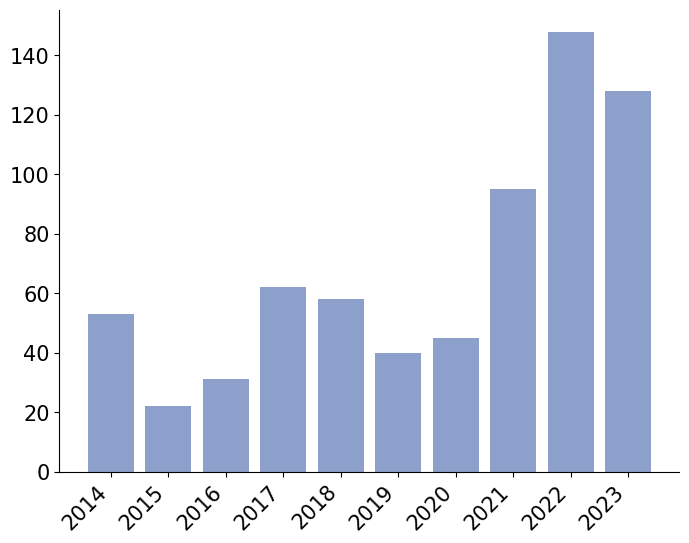

In [2]:
row_counts_all=[]
'''
heatwaves=['CMA_yellow','CMA_orange','CMA_red','WMO_90TH_1D','WMO_90TH_2D','WMO_90TH_3D',
        'WMO_95TH_1D','WMO_95TH_2D','WMO_95TH_3D','NOAA_10C_1D','NOAA_10C_2D','NOAA_10C_3D']
'''
heatwaves=['CMA_yellow']
cities=['beijing','xian','changsha','shenzhen']
years=[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
count_all=[0,0,0,0,0,0,0,0,0,0]
for heatwave in heatwaves:
    count_all=[0,0,0,0,0,0,0,0,0,0]
    for city in cities:
        count_city=[]
        for year in years: 
            date_range=[pd.to_datetime(f'{year}-01-01', format='%Y-%m-%d'),pd.to_datetime(f'{year}-12-31', format='%Y-%m-%d')]
            df=pd.read_csv(f'C:/Users/86158/Desktop/外卖糖分摄入/weather file/{city}_weather_data_{year}.csv')
            count_city.append(len(df[(df[heatwave]==1)&(df['YEARMODA']>=f"{year}-01-01")&(df['YEARMODA']<=f"{year}-12-31")]))
        for i in range(len(count_all)):
            count_all[i]+=count_city[i]
        print(city+f":{count_city}")
    print("all"+f":{count_all}")
    COLOR = sns.color_palette("Set2")
    plt.rcParams['font.size'] = 15
    plt.figure(figsize=(8, 6))
    plt.bar(years, count_all, color=COLOR[2])
    plt.xticks(years, rotation=45, ha='right')
    #plt.title('four cities'+'_'+heatwave)
            #plt.xlabel('Year')
            #plt.ylabel(None)
            #plt.yticks([])
            #plt.ylabel('Number of Extreme Hot Days')
    sns.despine()
    plt.show()

# Figure S3 b

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
all_data = pd.DataFrame()
beijing_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/beijing_naicha.parquet")
beijing_data=beijing_data[(beijing_data['dt'] >= '2019-05-21') & (beijing_data['dt'] <= '2019-09-16')]
beijing_data['city']='beijing'
beijing_user=len(beijing_data['user_id'].unique())
all_data = pd.concat([all_data, beijing_data], ignore_index=True)

xian_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/xian_naicha.parquet")
xian_data=xian_data[(xian_data['dt'] >= '2019-05-21') & (xian_data['dt'] <= '2019-09-09')]
xian_data['city']='xi\'an'
xian_user=len(xian_data['user_id'].unique())
all_data = pd.concat([all_data, xian_data], ignore_index=True)

changsha_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/changsha_naicha.parquet")
changsha_data=changsha_data[(changsha_data['dt'] >= '2019-05-22') & (changsha_data['dt'] <= '2019-10-10')]
changsha_data['city']='changsha'
changsha_user=len(changsha_data['user_id'].unique())
all_data = pd.concat([all_data, changsha_data], ignore_index=True)

shenzhen_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/shenzhen_naicha.parquet")
shenzhen_data=shenzhen_data[(shenzhen_data['dt'] >= '2019-03-26') & (shenzhen_data['dt'] <= '2019-11-27')]
shenzhen_data['city']='shenzhen'
shenzhen_user=len(shenzhen_data['user_id'].unique())
all_data = pd.concat([all_data, shenzhen_data], ignore_index=True)
print(f"beijing user num:{beijing_user}")
print(f"xian user num:{xian_user}")
print(f"changsha user num:{changsha_user}")
print(f"shenzhen user num:{shenzhen_user}")

beijing user num:14520
xian user num:11386
changsha user num:21686
shenzhen user num:25348


In [5]:
for i in range(4):
    if i==0:
        df=beijing_data.rename(columns={'week_dt_x':'week_dt','cnt':'num_naicha'})
    elif i==1:
        df=xian_data.rename(columns={'week_dt_x':'week_dt','cnt':'num_naicha'})
    elif i==2:
        df=changsha_data.rename(columns={'week_dt_x':'week_dt','cnt':'num_naicha'})
    elif i==3:
        df=shenzhen_data.rename(columns={'week_dt_x':'week_dt','cnt':'num_naicha'})
    print('奶茶用户数：',df['user_id'].nunique())
    df=df.groupby('dt').agg({
        'week_dt': 'first',
        'day_type': 'first',
        'TEMP': 'first',
        'VISIB': 'first',
        'WDSP': 'first',
        'MXSPD': 'first',
        'MAX': 'first',
        'MIN': 'first',
        'PRCP': 'first',
        'RH': 'first',
        'city':'first',
        'num_delivery': 'first',
        'num_dessert': 'first',
        'sugar_weight':'sum',
        'num_naicha':'sum', 
        }).reset_index()
    df['dt'] = pd.to_datetime(df['dt'], format='%Y-%m-%d')
    df['week_of_year'] = df['dt'].dt.strftime('%W').astype(int) + 1
    df['dt'] = df['dt'].dt.strftime('%Y-%m-%d')
    df['user_num'] = all_data.groupby('dt')['user_id'].transform('nunique')
    #df['num_naicha']=df['num_naicha']/df['user_num']
    if i==0:
        beijing_data=df
    elif i==1:
        xian_data=df
    elif i==2:
        changsha_data=df
    elif i==3:
        shenzhen_data=df

奶茶用户数： 14520
奶茶用户数： 11386
奶茶用户数： 21686
奶茶用户数： 25348


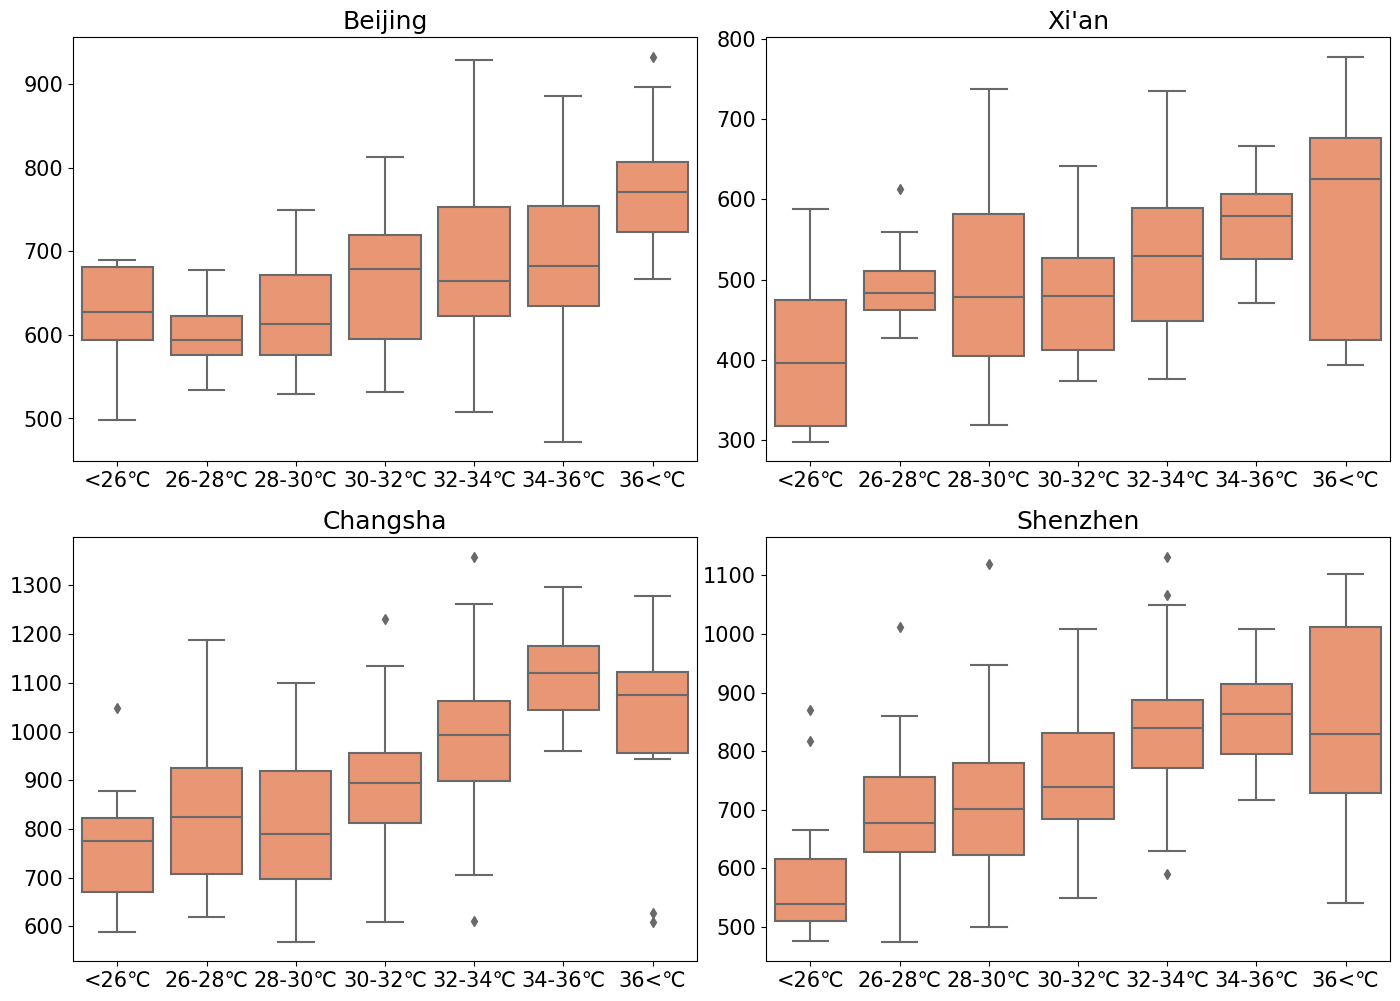

In [6]:
#print(all_data)
def custom_bins(x):
    if x < 36 and x> 26:
        start = int((x - 26) // 2) * 2 + 26
        end = start + 2
        return f"{start}-{end}℃"
    elif x<26:
        return "<26℃"
    else:
        return "36<℃"
city=['Beijing','Xi\'an','Changsha','Shenzhen']
#plt.title(f'Naicha_num Distribution by Temperature Group')
plt.figure(figsize=(17, 12))
for i in range(1,5):
    if i==1:
        df=beijing_data
    elif i==2:
        df=xian_data
    elif i==3:
        df=changsha_data
    elif i==4:
        df=shenzhen_data
    df['MAX_group'] = df['MAX'].apply(custom_bins).astype('category')
    df['MAX_group'] = df['MAX_group'].cat.reorder_categories(
    ["<26℃"]+[f"{start}-{start+2}℃" for start in range(26, 36, 2)]+["36<℃"], ordered=True)
    # 分区间
    #df['MAX_group'] = pd.cut(df['MAX'], bins=range(24, 44, 2), right=False)

    # IQR
    Q1 = df['num_naicha'].quantile(0.25)
    Q3 = df['num_naicha'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df['num_naicha'] >= lower_bound) & (df['num_naicha'] <= upper_bound)]

    # 绘制箱线图
    ax = plt.subplot(2, 2, i)
    COLOR = sns.color_palette("Set2")
    sns.boxplot(x='MAX_group', y='num_naicha', data=df_cleaned, color=COLOR[1])
    #plt.xticks(fontsize=14)
    #sns.boxplot(x='MAX_group', y='num_naicha', data=df_cleaned, color=COLOR[1])
    plt.title(f'{city[i-1]}', fontsize=18)
    #plt.xticks(fontsize=30)
    '''
    # 显示平均值
    means = df_cleaned.groupby('MAX_group')['num_naicha'].mean()
    for xtick in ax.get_xticks():
        plt.text(xtick, means[xtick], f'{means[xtick]:.2f}', horizontalalignment='center', color='black', weight='bold')
    '''
    # 去除横纵坐标的坐标名
    plt.xlabel(None)
    plt.ylabel(None)
    #sns.despine()
    plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplots_adjust(wspace=0.11, hspace=0.18)
path='C:/Users/86158/Desktop/外卖糖分摄入/程序整理/figure_boxplot.pdf'
plt.savefig(path)
plt.show()

# Figure3 c

In [7]:
all_data = pd.DataFrame()
beijing_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/beijing_naicha.parquet")
all_data = pd.concat([all_data, beijing_data], ignore_index=True)
xian_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/xian_naicha.parquet")
all_data = pd.concat([all_data, xian_data], ignore_index=True)
changsha_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/changsha_naicha.parquet")
all_data = pd.concat([all_data, changsha_data], ignore_index=True)
shenzhen_data=pd.read_parquet("C:/Users/86158/Desktop/外卖糖分摄入/HLM/chain_store_data/shenzhen_naicha.parquet")
all_data = pd.concat([all_data, shenzhen_data], ignore_index=True)
all_data['sugar_weight']=all_data["sugar_weight"]/all_data['cnt']

719017


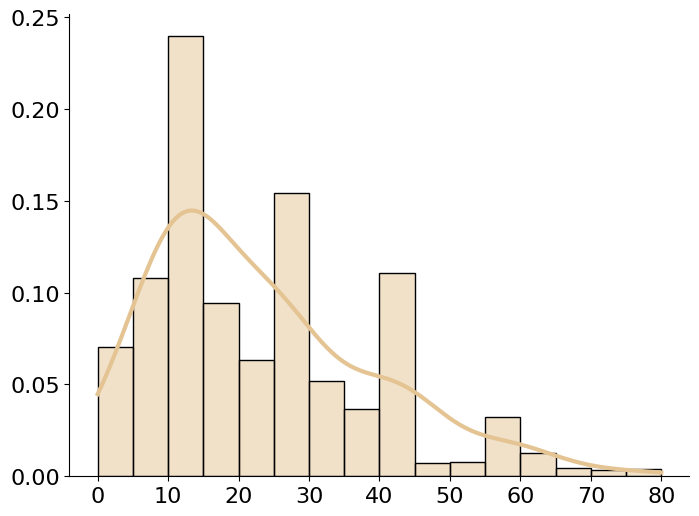

In [8]:
df=all_data
COLOR = sns.color_palette("Set2")
#print(df.iloc[1])
# 筛选出在0到80之间的数据
filtered_df = df[(df['sugar_weight'] >= 0) & (df['sugar_weight'] <= 80)]
print(len(filtered_df))
bin_edges = np.arange(0, 85, 5)  # 区间边界
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制直方图和KDE拟合
sns.histplot(data=filtered_df['sugar_weight'], bins=bin_edges, kde=True, stat='probability', color=COLOR[-2], linewidth=1, 
             kde_kws={'bw_adjust': 6, 'cut': 0},line_kws={'linewidth': 3})

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel(None)
plt.ylabel(None)
sns.despine()

# 计算累积分布函数
sorted_data = filtered_df['sugar_weight'].sort_values()
cumulative_dist = np.linspace(0., 1., len(sorted_data))
cdf_series = pd.Series(cumulative_dist, index=sorted_data)

# 找到80%数据点的位置
lower_bound = cdf_series[cdf_series >= 0.1].index[0]
upper_bound = cdf_series[cdf_series >= 0.9].index[0]

# 打印腰的区间
#plt.axvspan(lower_bound, upper_bound, color='gray', alpha=0.5, label=f'Waist between {lower_bound:.2f} and {upper_bound:.2f}')
#plt.legend(fontsize=14)
#print(filtered_df['sugar_weight'].mean())
#print(filtered_df['sugar_weight'].median())
path='C:/Users/86158/Desktop/外卖糖分摄入/程序整理/figure_sugar.pdf'
plt.savefig(path)
plt.show()
